### Import Quasar catalog for DR16

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr16/eboss/qso/DR16Q/"
file="DR16Q_v4.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)


if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    

    
catalog=Table.read(local_file)
#catalog.colnames
#catalog
catalog



w=(catalog['THING_ID']>0) & (catalog['Z_VI']>=2.1) & (catalog['RA']!=catalog['DEC']) & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)

reduced_cat=catalog[w]
reduced_cat
#catalog
#plt.style.use('bmh')
#plt.hist(reduced_cat['FIRST_SNR'])
#stats.describe(reduced_cat['FIRST_SNR'])

/home/colgoat/Jupyter/DR16Q_v4.fits already exist


SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,Z_DLA,NHI_DLA,CONF_DLA,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX,PSFFLUX_IVAR,PSFMAG,PSFMAGERR,EXTINCTION,M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float64[5],float64[5],float64[5],float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32[74],int32[74],int16[74],int16[74],uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32[5],float64[5],float32[5],float64[5],float32[5],float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,bytes21,float64,float64,float32,float32,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,int16,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824305,6177,56268,595,QSO,QSO,1,2.5112713020076285,0,-1.0,-1,-1,-1,244864389,2.497,3,3,2.4979407787323,1,-1.0,-1,-1.0,-1.0,1,2.497,VI,2.497960329055786,0,1237656495650570598,2.495224574735003,0,4279.918210569369,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,4.953938961029053,2199023255552,0,0,0,0,0,0,1,1,6172 .. -1,56269 .. -1,366 .. -1,2 .. -1,2,2566,301,4,309,358,4000.0,0.0,-153.979125

In [4]:
max(catalog['PLATE'])

11704

### Creating small catalog

In [17]:
small_cat=reduced_cat[0:169837]

#small_cat

for i in range(1):
    print("--", i + 1)
    print("Label:", small_cat['Z'][i])

-- 1
Label: 2.497


### Plot data

(array([1.00778e+05, 4.48670e+04, 1.72410e+04, 5.42600e+03, 1.03600e+03,
        3.46000e+02, 5.90000e+01, 2.30000e+01, 2.50000e+01, 3.60000e+01]),
 array([2.1       , 2.59095158, 3.08190315, 3.57285473, 4.0638063 ,
        4.55475788, 5.04570946, 5.53666103, 6.02761261, 6.51856419,
        7.00951576]),
 <BarContainer object of 10 artists>)

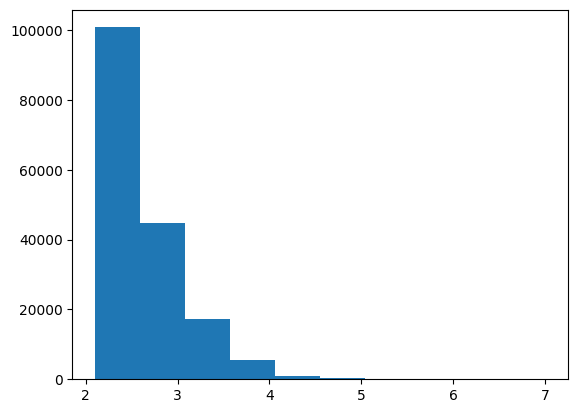

In [18]:
plt.hist(small_cat['Z'])

### Saving data as a new fits catalog file for quasars with query

In [19]:
from astropy.io import fits

archivo = fits.open('exDR16Qcat.fits')
#archivo.info()
#archivo[1] = hdu # assuming the first extension is a table

#hdu[0] = archivo[0]
hdu = fits.BinTableHDU(small_cat)
archivo[1] = hdu


archivo.close()

passer = archivo

with fits.open('exDR16Qcat.fits', mode='update') as passer:
    # Change something in hdul.
    
    passer[1] = hdu
    
    
    
    passer.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


### Checking the number of saved objects in small catalog

In [6]:
pruf=Table.read('exDR16Qcat.fits')
pruf

SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,Z_DLA,NHI_DLA,CONF_DLA,BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX,PSFFLUX_IVAR,PSFMAG,PSFMAGERR,EXTINCTION,M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float64[5],float64[5],float64[5],float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32[74],int32[74],int16[74],int16[74],uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32[5],float64[5],float32[5],float64[5],float32[5],float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,bytes21,float64,float64,float32,float32,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,int16,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824305,6177,56268,595,QSO,QSO,1,2.5112713020076285,0,-1.0,-1,-1,-1,244864389,2.497,3,3,2.4979407787323,1,-1.0,-1,-1.0,-1.0,1,2.497,VI,2.497960329055786,0,1237656495650570598,2.495224574735003,0,4279.918210569369,-1.0,7682,0.0,-1.0,7682,0.0,2.512824164931536,0,37.54399460219483,2.483751897812517,0,71.68050159068986,2.4945086598323947,0,428.5430142735212,2.495946111809488,0,1247.403767220968,2.4981523,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.43513870239258,4.953938961029053,2199023255552,0,0,0,0,0,0,1,1,6172 .. -1,56269 .. -1,366 .. -1,2 .. -1,2,2566,301,4,309,358,4000.0,0.0,-153.979125

### Comparing the FITS properties between saved and prior catalog

In [21]:
nuevo = fits.open('exDR16Qcat.fits')
nuevo.info()

Filename: exDR16Qcat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    434   169837R x 183C   [18A, D, D, J, J, I, 6A, 6A, I, D, I, D, I, I, I, K, D, I, I, D, I, D, I, D, D, I, D, 12A, D, J, 19A, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, E, 5D, 5D, 5D, E, D, D, D, D, D, D, D, D, K, K, K, K, K, K, J, J, J, 74J, 74J, 74I, 74I, B, J, 3A, J, J, J, D, D, D, D, 14A, J, D, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D, I, 28A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [22]:
nuevo = fits.open('DR16Q_v4.fits')
nuevo.info()

Filename: DR16Q_v4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    375   750414R x 183C   [18A, D, D, J, J, I, 6A, 6A, I, D, I, D, I, I, I, K, D, I, I, D, I, D, I, D, D, I, D, 12A, D, J, 19A, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, D, K, D, E, 5D, 5D, 5D, E, D, D, D, D, D, D, D, D, K, K, K, K, K, K, J, J, J, 74J, 74J, 74I, 74I, B, J, 3A, J, J, J, D, D, D, D, 14A, J, D, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D, I, 28A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [4]:
file="DLA_DR16.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)
DLA=Table.read(local_file)
DLA

THING_ID,RA,DEC,PLATE,MJD,FIBERID,ZQSO,NHI,Z,CONF
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
287103247.0,0.005912092570781624,20.012258452497782,6110.0,56279.0,86.0,3.082023629353311,20.710975781896014,2.3557090609795064,0.9625
285313316.0,0.012307435568345682,19.82617796916196,7596.0,56945.0,832.0,2.357296593784699,20.555276073878634,2.3844204256963235,1.0
144856917.0,0.01497649948680646,3.905254822374602,8741.0,57390.0,37.0,2.275441965377344,20.34902386696055,2.2944611112082223,1.0
148457488.0,0.015233669889425983,4.248977370600125,8741.0,57390.0,973.0,2.728868328409606,20.486521915426064,2.16362023648739,1.0
165433951.0,0.015955572277277952,6.1797883783677365,4535.0,55860.0,314.0,2.271085792448451,20.550606336855555,2.2944611112082227,1.0
21073834.0,0.021279736426293994,-10.813915417666827,7167.0,56604.0,290.0,2.711740870663694,20.864541040594045,2.480040279357268,1.0
...,...,...,...,...,...,...,...,...,...
398731303.0,359.9877369653568,34.34935045792181,7145.0,56567.0,232.0,2.304836955160266,20.594082193630975,2.244772858384911,1.0
63649488.0,359.98913961092,-1.6793427831270211,4354.0,55810.0,660.0,3.1189996876510615,20.40390016850327,2.6114717893476436,1.0


In [5]:
file="DLA_DR14.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)
DLA=Table.read(local_file)
DLA

THING_ID,MJD-PLATE-FIBER,RA,DEC,ZQSO,fDLA,fBAL,BI,CNR,Z,NHI,cc,log(Pcc),saap,Dcore,Pcore,Fcore,Ecore,Ccore,fg,CII_1334,b1,SiII_1526,b2,FeII_1608,b3,AlII_1670,b4,FeII_2344,b5,FeII_2374,b6,FeII_2382,b7,FeII_2586,b8,FeII_2600,b9,MgII_2796,b10,MgII_2803,b11,MgI_2852,b12
int32,bytes16,float64,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,bytes6,bytes6,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
21073834,56604-07167-0290,0.02128,-10.8139,2.715,1,0,-1,1.9,2.484,21.06,0.495,-8.23,0.49,0.19,0.342,0.199,0.550,1.183,0,0.6,-1.0,1.14,-1.0,1.43,-1.0,1.18,-1.0,3.48,-1.0,6.18,-1.0,7.16,-1.0,12.59,-1.0,4.79,-1.0,9.86,-1.0,19.72,-1.0,28.23,-1.0
198508864,56190-06182-0338,0.04538,9.7097,2.777,1,0,-1,7.1,2.3447,21.12,0.737,-15.41,0.33,0.22,0.156,0.180,0.357,2.75,0,0.0,0.0,1.42,0.07,0.39,0.09,1.53,0.11,1.2,0.29,0.83,-1.0,1.15,0.35,1.34,0.17,1.75,0.14,2.26,0.53,2.73,-1.0,3.2,-1.0
113418794,55477-04216-0718,0.06321,0.8092,3.028,0,0,-1,9.5,2.524,20.88,0.895,-21.66,0.15,0.103,0.983,0.104,0.400,3.989,0,0.0,0.0,1.54,0.06,0.73,0.05,1.85,0.11,1.89,0.14,1.56,0.34,1.86,-1.0,2.14,0.14,2.62,0.1,2.86,-1.0,2.81,0.56,0.0,0.0
351285912,56540-06511-0114,0.07352,27.6466,2.52,1,0,-1,2.4,2.5134,20.48,0.874,-15.59,0.46,0.175,0.82,0.100,0.512,2.593,0,0.76,0.19,1.33,0.19,1.04,-1.0,1.09,-1.0,1.79,-1.0,4.65,-1.0,4.32,-1.0,1.73,-1.0,2.72,-1.0,5.06,-1.0,5.4,-1.0,0.0,0.0
254324264,56269-06172-0643,0.08025,16.1681,2.624,1,0,-1,2.9,2.5609,20.61,0.755,-9.43,0.38,0.226,0.42,0.023,0.305,1.461,0,0.4,-1.0,0.7,0.13,0.6,0.13,0.53,-1.0,3.23,-1.0,2.67,-1.0,1.14,-1.0,0.69,-1.0,1.12,-1.0,6.88,-1.0,3.3,-1.0,0.0,0.0
75087955,55477-04216-0290,0.0852,-0.8446,2.735,1,0,-1,2.2,2.4283,20.44,0.39,-2.72,0.47,0.248,0.449,0.046,0.464,0.92,0,0.0,0.0,0.58,-1.0,0.6,-1.0,0.48,-1.0,2.39,-1.0,1.91,-1.0,1.58,-1.0,3.89,-1.0,6.34,-1.0,4.52,-1.0,4.94,-1.0,4.98,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23017942,56604-07167-0306,359.93361,-10.2119,2.423,1,0,-1,3.3,2.215,20.48,0.662,-6.64,0.37,0.245,0.412,-0.050,0.916,3.401,0,0.48,-1.0,0.56,-1.0,0.48,-1.0,0.46,-1.0,2.15,-1.0,2.77,-1.0,2.48,-1.0,3.6,-1.0,7.65,-1.0,7.64,-1.0,7.0,-1.0,3.47,-1.0
23017942,56604-07167-0306,359.93361,-10.2119,2.423,1,0,-1,3.3,2.2817,21.77,0.609,-25.59,0.45,0.086,0.825,0.084,0.691,3.422,0,0.68,-1.0,1.09,0.16,0.62,0.11,0.69,-1.0,2.46,-1.0,3.57,-1.0,4.38,-1.0,2.9,-1.0,2.29,-1.0,3.31,-1.0,2.4,0.57,20.48,-1.0
